# ORCS basics

Note that more advanced examples can be found on [ORCS examples](http://celeste.phy.ulaval.ca/orcs-doc/examples.html) and [SIGNALS-Workshop](https://github.com/sitelle-signals/workshop)

A lot of what is summarized here comes from [ORCS documentation](http://celeste.phy.ulaval.ca/orcs-doc/).

In [1]:
import pylab as pl
import numpy as np

import orcs.process
import orb.utils.io # utility library to write and read files

## Loading your cube

In [2]:
cube = orcs.process.SpectralCube('M57_SN3.merged.cm1.1.0.hdf5')

INFO| Data shape : (2048, 2064, 593)
INFO| Cube is in WAVENUMBER (cm-1)
INFO| Cube is CALIBRATED in wavenumber


## Extracting the deep frame

In [3]:
# first of all the deep frame of the cube must be extracted (along with the WCS)
df = cube.get_deep_frame()
hdr = cube.get_wcs_header()
orb.utils.io.write_fits('deep_frame_wcs.fits', df, fits_header=hdr, overwrite=True)

INFO| Data written as deep_frame_wcs.fits in 0.28 s 


'deep_frame_wcs.fits'

(400, 1300)

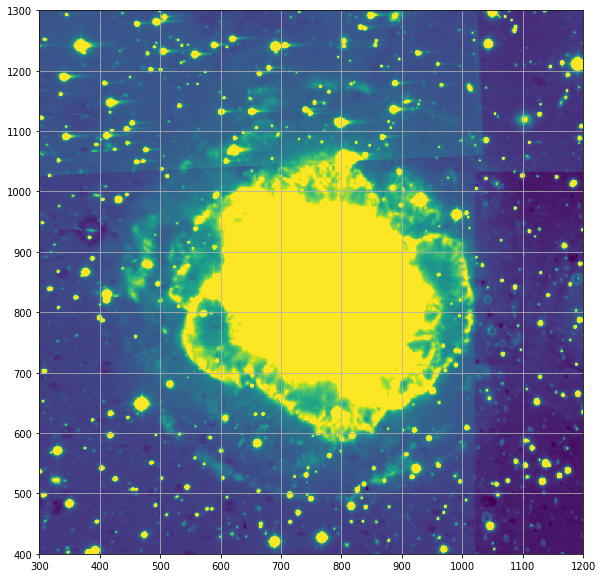

In [75]:
pl.figure(figsize=(10,10))
vmin, vmax = np.nanpercentile(df, [5, 95])
pl.imshow(df.T, vmin=vmin, vmax=vmax)
pl.grid()
pl.xlim((300,1200))
pl.ylim((400,1300))

## Extracting data

`cube.extract_spectrum(x, y, r)`

* x, y: pixel position of the **center** (in pixels)
* r: radius (in pixels)

INFO| Number of integrated pixels: 29


 [==========] [100%] [completed in 0.030 s]
 [==========] [100%] [completed in 0.168 s]


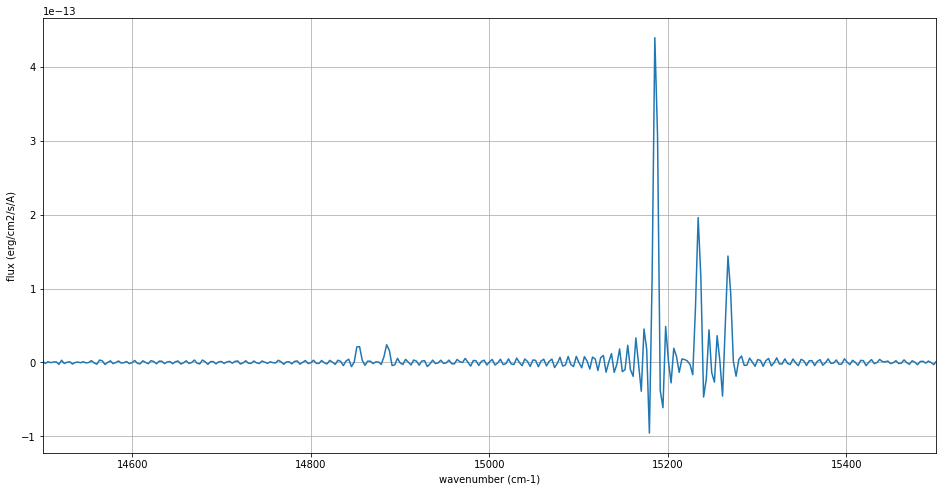

In [18]:
# here we extract the integrated spectrum from a circular aperture centered on the pixel 919, 893 with a radius of 2 pixels
axis, spectrum = cube.extract_spectrum(817, 906, 3)
pl.figure(figsize=(16c, 8))
pl.plot(axis, spectrum)
pl.xlabel('wavenumber (cm-1)')
pl.ylabel('flux (erg/cm2/s/A)')
pl.xlim((14500, 15500))
pl.grid()

## Fitting a spectrum

`cube.fit_lines_in_spectrum(x, y, r, lines, fmodel='sinc', nofilter=False, *fit_parameters)`

* x, y: pixel position of the **center** (in pixels)
* r: radius (in pixels)

* lines: emission lines to fit e.g. 

```python
['[OIII]5007', '[OIII]4959', 'Hbeta']
```

* `fmodel`: emission line model (this time we are going to use a pure sinc but oter models are available see [orcs-intermediate](./orcs-intermediate.ipynb)):

```python
fmodel='sinc'
```

* `nofilter`: must be set to True if the continuum is negligible (which is the case with M57)

```python
nofilter='True'
```


INFO| Number of integrated pixels: 29


 [==========] [100%] [completed in 0.036 s]
 [==========] [100%] [completed in 0.130 s]


(14500, 15500)

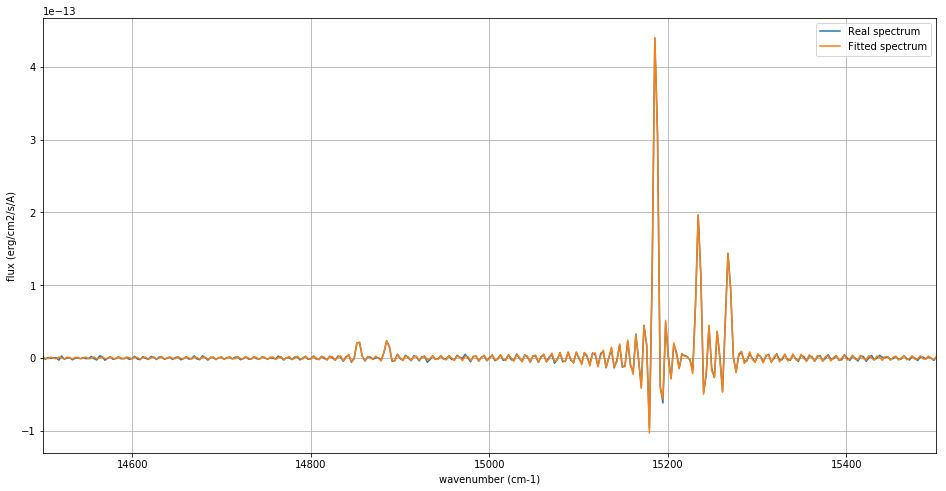

In [63]:
axis, spectrum, fit_res = cube.fit_lines_in_spectrum(817, 906, 3,
                                                     ['Halpha', '[NII]6583', '[NII]6548', '[SII]6717', '[SII]6731'], # emission lines
                                                     fmodel='sinc', # line model
                                                     nofilter=True) # no continuum

pl.figure(figsize=(16, 8))

# plot spectrum
pl.plot(axis, spectrum, label='Real spectrum') 
# plot fitted spectrum
pl.plot(axis, fit_res['fitted_vector'], label='Fitted spectrum')

pl.legend()
pl.grid()
pl.xlabel('wavenumber (cm-1)')
pl.ylabel('flux (erg/cm2/s/A)')
pl.xlim((14500, 15500))

## Fit outputs

The output of a fit is a dict. We describe here the most important.

### calculated parameters Flux and Velocity : 'velocity', 'velocity_err', 'flux', 'flux_err'

Velocity is, in fact, one of the fitted parameters and the final line wavenumber os computed from its initial wavenumber and its measured velocity. Flux is computed from the fwhm and the amplitude, in general, depending on the model (here a `sinc`).

In [80]:
print 'velocity: {} km/s'.format(fit_res['velocity'])
print '     uncertainty: {} km/s'.format(fit_res['velocity_err'])
print 'flux: {} erg/cm2/s'.format(fit_res['flux'])
print '     uncertainty: {} erg/cm2/s'.format(fit_res['flux_err'])


velocity: [67.48961563 68.41098167 69.61497685 69.78534804 71.58063029] km/s
     uncertainty: [0.37035001 0.15991863 0.4743773  2.9870948  3.08562217] km/s
flux: [4.06576405e-13 9.46082340e-13 3.15218942e-13 5.40149022e-14
 5.26281065e-14] erg/cm2/s
     uncertainty: [2.91560804e-15 2.92789277e-15 2.89941204e-15 3.04740661e-15
 3.06067333e-15] erg/cm2/s
